In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel(r'/content/gdrive/My Drive/Colab Notebooks/ЛР3 ПАД_Исходные данные_Бухов.xlsx')
data.head(6)

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,8.5,16.3,6.8,5.6,17.4,163,151,23.6,2344
1,9.3,12.6,7.2,5.5,25.3,194,239,9.2,1809
2,8.7,4.6,6.5,4.2,16.2,152,192,26.9,2406
3,8.6,6.2,6.1,4.0,17.4,190,205,20.1,2023
4,8.1,11.4,7.7,6.4,5.9,183,198,22.0,1419
5,9.2,15.9,7.8,5.3,16.7,169,148,22.7,2094


In [5]:
# Нормирование данных (Z-нормализация)
mean = np.mean(data, axis=0)
dev = np.std(data, axis=0)
norm_data = (data - mean) / dev

norm_data.head()

,х1,х2,х3,х4,х5,х6,x7,x8,x9
0,-0.386722,0.655175,-0.622359,0.743334,-0.258901,-0.149967,-0.477206,-0.400563,0.649449
1,-0.025909,-0.536613,0.099885,0.650169,1.498503,0.356997,1.770773,-1.578240,-0.213725
2,-0.296519,-3.113451,-1.164042,-0.560969,-0.525849,-0.329857,0.570148,-0.130679,0.749481
3,-0.341620,-2.598083,-1.886286,-0.747298,-0.258901,0.291583,0.902235,-0.686804,0.131544
4,-0.567128,-0.923139,1.002690,1.488650,-2.817148,0.177107,0.723419,-0.531416,-0.842956


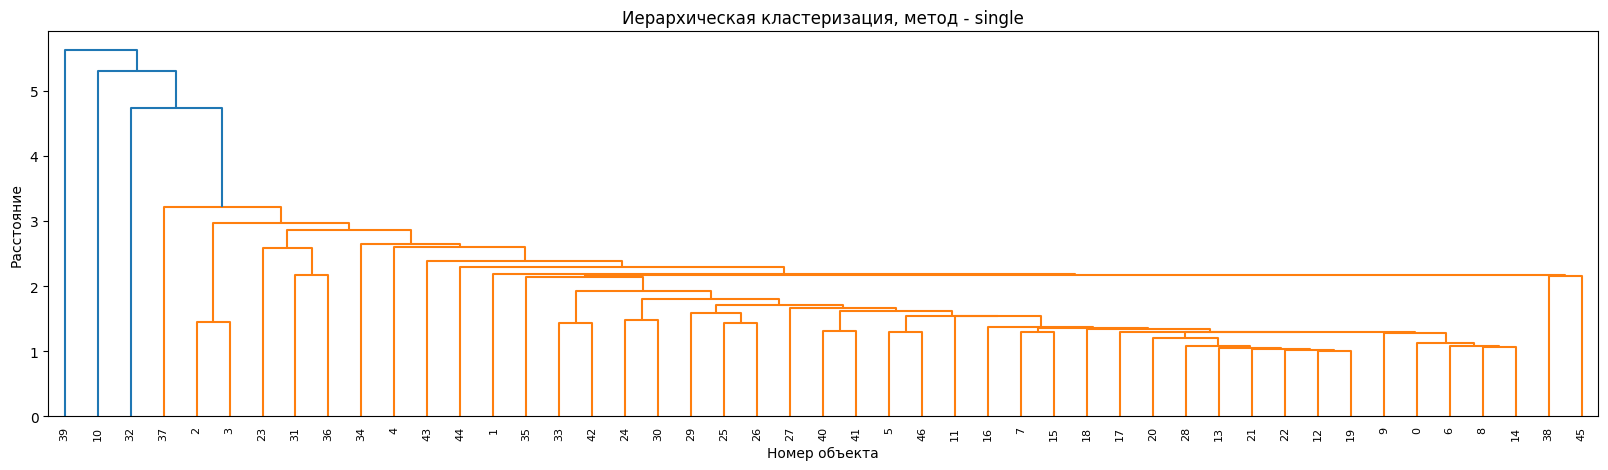

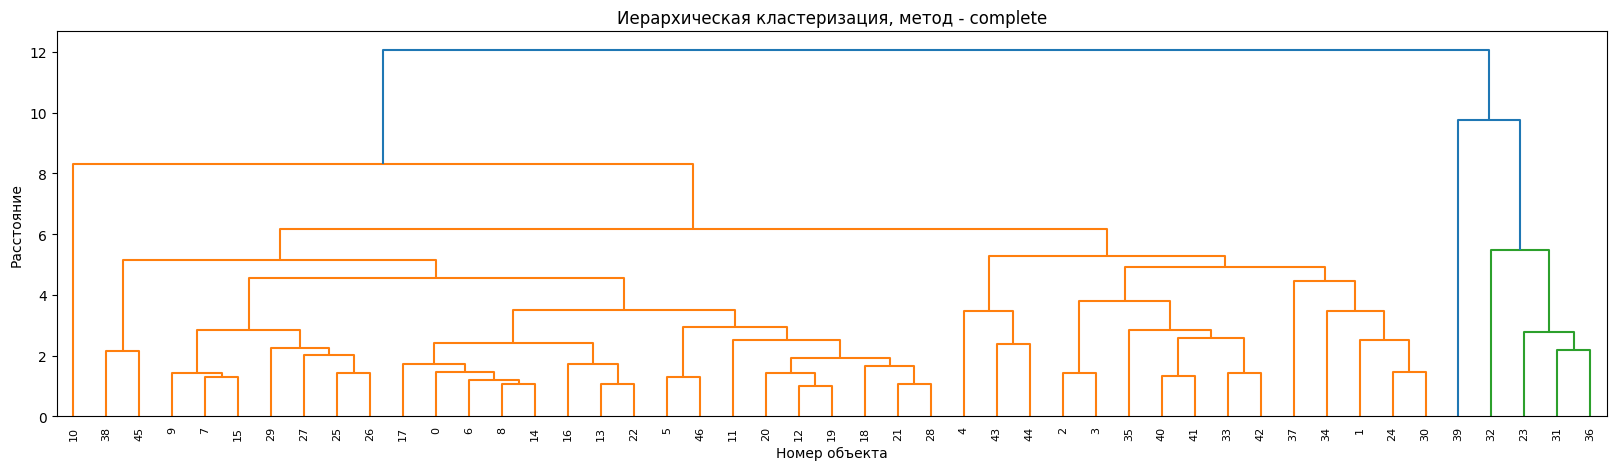

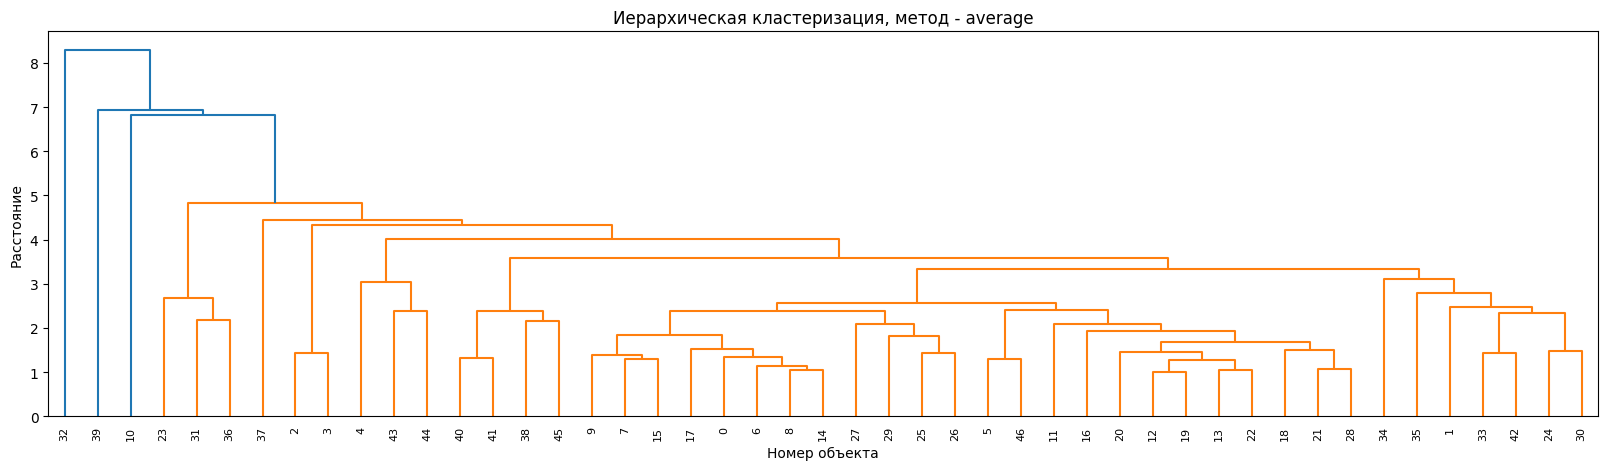

In [6]:
#Дендрограммы для каждого из 3-х типов связей
linkage_methods_arr = ['single', 'complete', 'average'] #ближайший сосед, дальний сосед, расстояние между центрами кластеров
for method in linkage_methods_arr:
  D = linkage(norm_data, method=method)
  plt.figure(figsize=(20, 5))
  dendrogram(D)
  plt.title(f'Иерархическая кластеризация, метод - {method}')
  plt.xlabel('Номер объекта')
  plt.ylabel('Расстояние')
  plt.show()

In [7]:
from sklearn.cluster import AgglomerativeClustering
#Получение итоговых меток кластера для каждого объекта
m = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = m.fit_predict(norm_data)
print(labels)

[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 2 0 0 0 0 0 0 0]


In [8]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
#Функция расчета индекса Дэвиса-Болдина
def boldin_scorer(estimator, Data):
  estimator.fit(Data)
  return davies_bouldin_score(Data, estimator.labels_)

#Задаем сетку перебора
kmeans = KMeans(n_init=10)
param_grid = {'n_clusters' : range(2, 9)}
grid_search = GridSearchCV(kmeans, param_grid, scoring = boldin_scorer)

#Перебираем по сетке
grid_search.fit(norm_data)

#Находим оптимальное число кластеров
optimal_clasters_number = grid_search.best_params_['n_clusters']
print('Оптимальное число кластеров: ', optimal_clasters_number)

#Находим kmeans для оптимального числа кластеров
best_kmeans = KMeans(n_init=10, n_clusters=optimal_clasters_number)

#Находим метки
kmeans_labels = best_kmeans.fit_predict(norm_data)
print('Метки кластеров: ', kmeans_labels)



Оптимальное число кластеров:  3
Метки кластеров:  [1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 0 1 1 1 0 0 2 2 0 0 0 2
 0 0 0 0 0 0 0 0 0 1]


In [9]:
from sklearn.metrics import rand_score
#Расчитываем индекс Рэнда двух полученных моделей
rand_index = rand_score(kmeans_labels, labels) #labels - метки для дальнего соседа
print(rand_index)

0.5790934320074006


In [10]:
clusters_data = norm_data.copy()
clusters_data['Cluster'] = kmeans_labels
cluster_means = clusters_data.groupby('Cluster').mean()
print(cluster_means)

               х1        х2        х3        х4        х5        х6        x7  \
Cluster                                                                         
0        0.201972 -0.702751 -0.223224  0.252994  0.541941 -0.060452  0.430321   
1       -0.535181  0.673964  0.340633  0.048482 -0.480431  0.241159 -0.137668   
2        2.251718 -0.705718 -0.983481 -1.492615  0.308362 -1.159806 -1.218018   

               x8        x9  
Cluster                      
0       -0.183192  0.444886  
1       -0.336159 -0.468376  
2        2.887118  0.697045  
